# DS4A Project - Airlines Revenue Optimization 

Group members: Angela Guan, Sruthi Machina, Sherry Shi, Xinyue(Katherine) Zhang. 

**Objective**: Provide solutions for airline companies for develop data-driven pricing decisions using demand forecasting, customer segmentation and fare optimization 

In [0]:
# Gets datasets and imports them into Colab 
%%capture 
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1QqQZ14Z7agy2sZQZUCtzhrnc_pnDn0z5' -O 'flight_traffic.csv'
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1IfKvqwJe8sBqM81oMhqwL5JUU0hLZ8RK' -O 'fares.csv'
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1CyC7RcxD2zmlrsSJcNfw9-sAHTp4HNm0' -O 'events_US.csv'
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1IJ8-Uqe_62nzkdB812mPVquiTPXFFgj9' -O 'airlines.csv'

In [0]:
import pandas as pd 
import numpy as np 
import seaborn as sns

def load_data():
  '''
  Loads the data and returns python dataframe
  '''
  airlines = pd.read_csv('airlines.csv')
  events = pd.read_csv('events_US.csv', encoding='latin-1')
  fares = pd.read_csv('fares.csv')
  flight = pd.read_csv('flight_traffic.csv')

  return airlines, events, fares, flight

airlines, events, fares, flight = load_data()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
airlines.head()


,airline_id,airline_name
0,AA,American Airlines Inc.
1,DL,Delta Air Lines Inc.
2,UA,United Airlines Inc.
3,WN,Southwest Airlines Co.
4,HA,Hawaiian Airlines Inc.


In [0]:
fares.head()

,quarter,airline_id,origin_airport,destination_airport,distance,10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170,180,190,200,210,220,230,240,250,260,270,280,290,300,310,320,330,340,350,...,2110,2120,2130,2140,2150,2160,2170,2180,2190,2200,2210,2220,2230,2240,2250,2260,2270,2280,2290,2300,2310,2320,2330,2340,2350,2360,2370,2380,2390,2400,2410,2420,2430,2440,2450,2460,2470,2480,2490,2500
0,1,AA,CLT,SGF,708,2,6,11,15,32,34,43,47,38,40,26,26,19,19,16,25,18,14,18,13,14,7,13,19,5,8,5,3,3,7,9,1,4,3,6,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,DL,DTW,SAN,1956,13,4,3,2,8,12,24,14,12,12,21,20,19,35,36,36,36,45,37,74,41,52,86,31,37,32,36,66,32,37,37,26,19,25,29,...,0,0,1,0,0,0,0,0,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,5,0,0,0,0,0,0,28
2,1,DL,MSP,ISN,546,7,11,14,36,52,54,40,41,35,42,42,18,24,16,17,14,10,12,12,13,8,4,3,6,5,6,7,4,0,6,3,1,2,3,2,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,AA,CLT,RDU,130,2573,1665,927,556,356,227,123,87,53,38,36,22,14,8,7,10,3,6,2,4,1,2,1,2,1,0,0,0,1,1,3,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,DL,ATL,RIC,481,112,186,379,650,799,678,739,644,582,445,446,316,254,233,222,232,165,133,103,87,89,90,82,64,47,49,37,35,40,41,18,18,22,22,33,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
flight.head()

,year,month,day,airline_id,origin_airport,destination_airport,scheduled_departure,actual_departure,taxi_out,wheels_off,wheels_on,taxi_in,scheduled_arrival,actual_arrival,cancelled,diverted,scheduled_elapsed,actual_elapsed,distance,airline_delay,weather_delay,air_system_delay,security_delay,aircraft_delay
0,2017,1,31,AA,CLT,PHX,1619,1615.0,18.0,1633.0,1829.0,7.0,1856,1836.0,0,0,277.0,261.0,1773,NaN,NaN,NaN,NaN,NaN
1,2017,1,12,AA,FLL,CLT,1305,1256.0,24.0,1320.0,1456.0,9.0,1508,1505.0,0,0,123.0,129.0,632,NaN,NaN,NaN,NaN,NaN
2,2017,1,14,AA,FLL,CLT,1305,1314.0,11.0,1325.0,1455.0,7.0,1508,1502.0,0,0,123.0,108.0,632,NaN,NaN,NaN,NaN,NaN
3,2017,1,18,AA,FLL,CLT,1305,1304.0,19.0,1323.0,1508.0,5.0,1508,1513.0,0,0,123.0,129.0,632,NaN,NaN,NaN,NaN,NaN
4,2017,1,25,AA,FLL,CLT,1305,1301.0,11.0,1312.0,1449.0,8.0,1508,1457.0,0,0,123.0,116.0,632,NaN,NaN,NaN,NaN,NaN


In [0]:
events.head()

,date,city,state,event_name
0,2/1/17,St. Louis,MO,NHL Winter Classic
1,4/1/17,New York,NY,National Board of Review of Motion Pictures Aw...
2,5/1/17,New York,NY,Winter Jazzfest NYC
3,5/1/17,Las Vegas,NV,International Consumer Electronics Show (CES)
4,5/1/17,New York,NY,Jazz Connect Conference


###Take a look at four US airlines

In [0]:
fares['airline_id'].unique()
fares = fares[fares['airline_id'] != '--']
fares

,quarter,airline_id,origin_airport,destination_airport,distance,10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170,180,190,200,210,220,230,240,250,260,270,280,290,300,310,320,330,340,350,...,2110,2120,2130,2140,2150,2160,2170,2180,2190,2200,2210,2220,2230,2240,2250,2260,2270,2280,2290,2300,2310,2320,2330,2340,2350,2360,2370,2380,2390,2400,2410,2420,2430,2440,2450,2460,2470,2480,2490,2500
0,1,AA,CLT,SGF,708,2,6,11,15,32,34,43,47,38,40,26,26,19,19,16,25,18,14,18,13,14,7,13,19,5,8,5,3,3,7,9,1,4,3,6,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,DL,DTW,SAN,1956,13,4,3,2,8,12,24,14,12,12,21,20,19,35,36,36,36,45,37,74,41,52,86,31,37,32,36,66,32,37,37,26,19,25,29,...,0,0,1,0,0,0,0,0,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,5,0,0,0,0,0,0,28
2,1,DL,MSP,ISN,546,7,11,14,36,52,54,40,41,35,42,42,18,24,16,17,14,10,12,12,13,8,4,3,6,5,6,7,4,0,6,3,1,2,3,2,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,AA,CLT,RDU,130,2573,1665,927,556,356,227,123,87,53,38,36,22,14,8,7,10,3,6,2,4,1,2,1,2,1,0,0,0,1,1,3,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,DL,ATL,RIC,481,112,186,379,650,799,678,739,644,582,445,446,316,254,233,222,232,165,133,103,87,89,90,82,64,47,49,37,35,40,41,18,18,22,22,33,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80818,4,AA,STL,MSY,604,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
80819,4,WN,SDF,ROC,544,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
80820,4,WN,BDL,ONT,2482,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
80821,4,WN,HRL,TUL,695,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
#pick the first four airlines
lines = airlines.iloc[0:4,]

In [0]:
lines["airline_id"]

0    AA
1    DL
2    UA
3    WN
Name: airline_id, dtype: object

In [0]:
#filter out fares for those flights
us_fare = fares.loc[fares["airline_id"].isin(lines["airline_id"]),]

In [0]:
us_fare.head()
price_bins = np.asarray(us_fare.iloc[:,5:].columns).astype(np.int)

In [0]:
#fare by airline
aa_fare = us_fare[us_fare["airline_id"] == "AA"]
dl_fare = us_fare[us_fare["airline_id"] == "DL"]
ua_fare = us_fare[us_fare["airline_id"] == "UA"]
wn_fare = us_fare[us_fare["airline_id"] == "WN"]

In [0]:
#most popular destination airport and most popular origin airport
#overall
us_fare.groupby("origin_airport").size().sort_values(ascending=False).head()#chicago

origin_airport
ORD    1088
ATL    1073
DEN     946
LAX     878
MSP     853
dtype: int64

In [0]:
us_fare.groupby("destination_airport").size().sort_values(ascending=False).head() #chicago

destination_airport
ORD    1083
ATL    1057
DEN     947
LAX     910
MSP     819
dtype: int64

In [0]:
#look at AA only
aa_fare.groupby("origin_airport").size().sort_values(ascending=False).head()

origin_airport
DFW    625
CLT    504
ORD    477
PHL    345
PHX    314
dtype: int64

In [0]:
#look at AA only
aa_fare.groupby("destination_airport").size().sort_values(ascending=False).head() #tx headquarter

destination_airport
DFW    626
CLT    493
ORD    478
PHL    350
PHX    314
dtype: int64

###Looking at the distribution of people across fare buckets

In [0]:
#look at aa by quarter
aa_q1 = aa_fare[aa_fare["quarter"] == 1]
aa_q2 = aa_fare[aa_fare["quarter"] == 2]
aa_q3 = aa_fare[aa_fare["quarter"] == 3]
aa_q4 = aa_fare[aa_fare["quarter"] == 4]

In [0]:
aa_q1_bins = aa_q1.iloc[:,5:].sum()

aa_q2_bins = aa_q2.iloc[:,5:].sum()

aa_q3_bins = aa_q3.iloc[:,5:].sum()

aa_q4_bins = aa_q4.iloc[:,5:].sum()


In [0]:
aa_q1_bins

10      115236
20      153882
30      166169
40      164336
50      160966
         ...  
2460        60
2470        49
2480       126
2490        67
2500      5463
Length: 250, dtype: int64

(-10000.0, 50000.0)

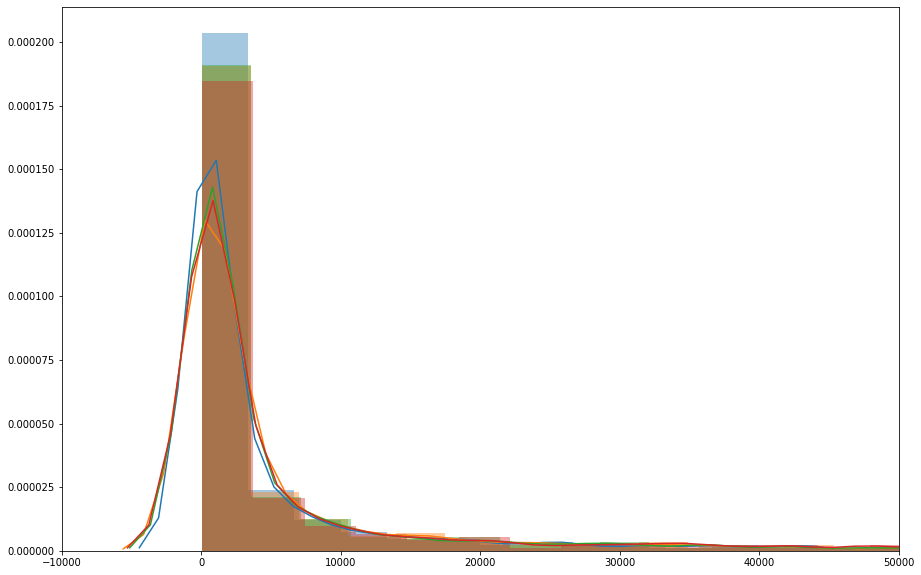

In [0]:
import matplotlib.pyplot as plt
plt.figure(figsize = (15,10))
sns.distplot(aa_q1_bins, label = "AA Q1")
sns.distplot(aa_q2_bins, label = "AA Q2")
sns.distplot(aa_q3_bins, label = "AA Q3")
sns.distplot(aa_q4_bins, label = "AA Q4")
plt.xlim(-10000,50000)
#np.asarray(aa_q1.iloc[:,5:].columns)
#not representative of how many people bought the ticket in the quarter, but representative of the concentration/frequency of each bin

We cannot tell the difference much by this plot, since there is no bin information, and there are some differences but hard to make conclusions

In [0]:
# Shrink bins 
new_bins = np.arange(100, 2600, 100)
def new_counts(array):
  new_array = np.array([])
  for i in range((len(array)//10)):
    bin_sum = sum(array[i*10:i*10+10])
    new_array = np.append(new_array, bin_sum)
  return new_array


In [0]:
new_counts(aa_q4_bins)

array([1.582223e+06, 8.975550e+05, 4.549960e+05, 2.688460e+05,
       1.551350e+05, 9.590100e+04, 6.450600e+04, 4.354600e+04,
       3.039600e+04, 2.299900e+04, 1.607800e+04, 1.253600e+04,
       9.382000e+03, 7.530000e+03, 6.133000e+03, 4.143000e+03,
       3.497000e+03, 2.936000e+03, 2.127000e+03, 1.973000e+03,
       1.566000e+03, 1.509000e+03, 1.046000e+03, 9.810000e+02,
       6.743000e+03])

In [0]:
aa_transformed1 = pd.DataFrame({"new_bin":new_bins,"freq":new_counts(aa_q1_bins)/sum(new_counts(aa_q1_bins)),
                               "Q":["Q1" for i in range(len(new_bins))]})
aa_transformed2 = pd.DataFrame({"new_bin":new_bins,"freq":new_counts(aa_q2_bins)/sum(new_counts(aa_q2_bins)),
                               "Q":["Q2" for i in range(len(new_bins))]})
aa_transformed3 = pd.DataFrame({"new_bin":new_bins,"freq":new_counts(aa_q3_bins)/sum(new_counts(aa_q3_bins)),
                               "Q":["Q3" for i in range(len(new_bins))]})
aa_transformed4 = pd.DataFrame({"new_bin":new_bins,"freq":new_counts(aa_q4_bins)/sum(new_counts(aa_q4_bins)),
                               "Q":["Q4" for i in range(len(new_bins))]})
aa_transformed = pd.concat([aa_transformed1,aa_transformed2,aa_transformed3,aa_transformed4])
aa_transformed

,new_bin,freq,Q
0,100,0.431823,Q1
1,200,0.243611,Q1
2,300,0.125100,Q1
3,400,0.068368,Q1
4,500,0.040953,Q1
...,...,...,...
20,2100,0.000424,Q4
21,2200,0.000408,Q4
22,2300,0.000283,Q4
23,2400,0.000266,Q4


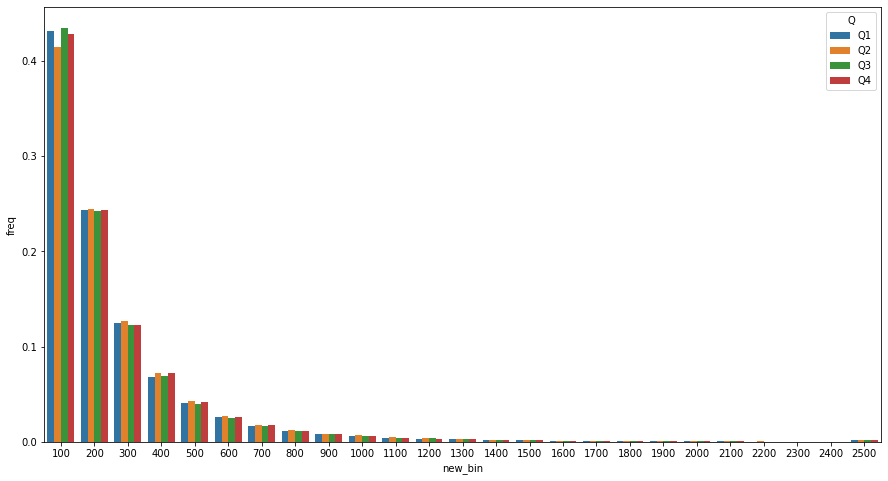

In [0]:
plt.figure(figsize=(15,8))
ax = sns.barplot(x="new_bin", y="freq", hue="Q", data=aa_transformed)

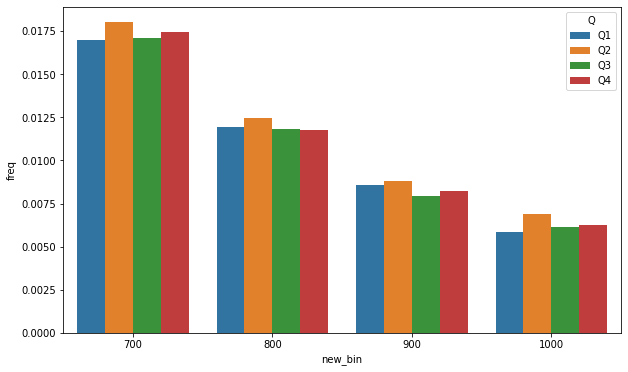

In [0]:
aa_filtered = aa_transformed[(aa_transformed["new_bin"] > 600) &(aa_transformed["new_bin"] < 1100) ]
plt.figure(figsize=(10,6))
ax = sns.barplot(x="new_bin", y="freq", hue="Q", data=aa_filtered)

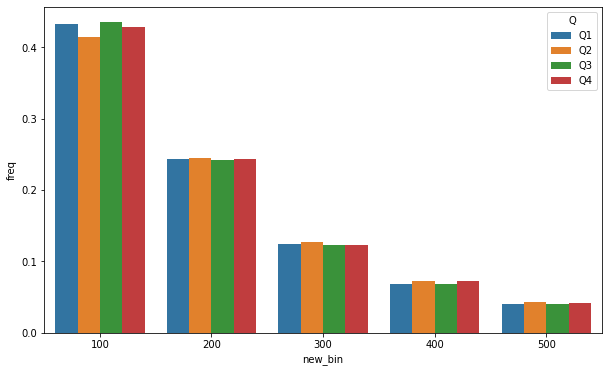

In [0]:
aa_filtered_low = aa_transformed[aa_transformed["new_bin"] < 600]
plt.figure(figsize=(10,6))
ax = sns.barplot(x="new_bin", y="freq", hue="Q", data=aa_filtered_low)

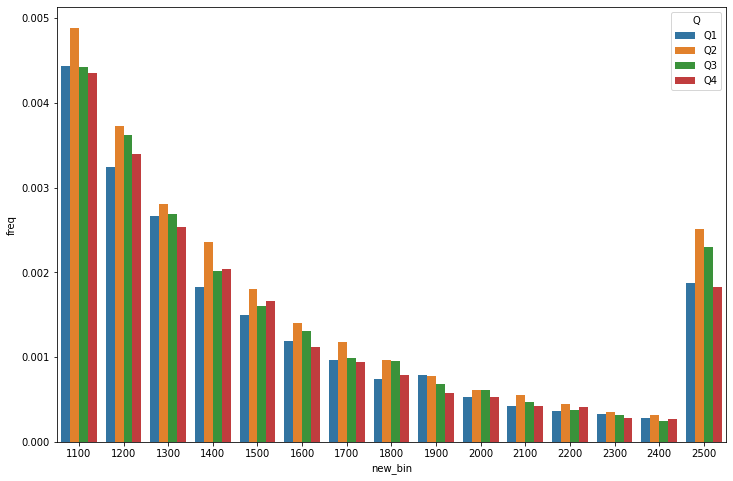

In [0]:
aa_filtered_high = aa_transformed[aa_transformed["new_bin"] > 1000]
plt.figure(figsize=(12,8))
ax = sns.barplot(x="new_bin", y="freq", hue="Q", data=aa_filtered_high)

Above I made bar charts for different bin level separatelt. First I shortened the bins to be 100$ range, then I plotted low, middle and high price bins since the overall bar chart is not displaying the low percentages. We can see that generally, quarter two has higher frequencies of purchase

In [0]:
#define a function to get quaterly revenue
def quarter_rev(quarter, fare_df):
  # if quarter == 0:
  #   all_flight_fare = fare_df.iloc[:,5:]
  #   all_flight_count = all_flight_fare.sum()
  #   return sum(np.asarray(all_flight_fare.columns).astype(np.float) * all_flight_count)
  fare_of_quarter = fare_df[fare_df["quarter"] == quarter]
  bins_df = fare_of_quarter.iloc[:,5:]
  count_by_bin = bins_df.sum()
  bins_numeric = np.asarray(bins_df.columns).astype(np.float)
  return sum(count_by_bin * bins_numeric)

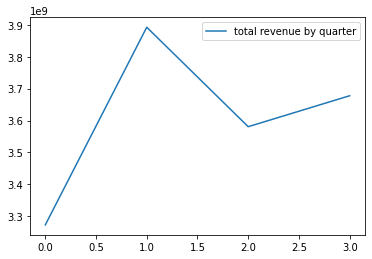

In [0]:
total_rev_1 = quarter_rev(1,fares)
total_rev_2 = quarter_rev(2,fares)
total_rev_3 = quarter_rev(3,fares)
total_rev_4 = quarter_rev(4,fares)
plt.plot([total_rev_1,total_rev_2,total_rev_3,total_rev_4],label="total revenue by quarter")
plt.legend()


In [0]:
#count of ppl
sum(aa_q1_bins), sum(aa_q2_bins), sum(aa_q3_bins), sum(aa_q4_bins)
quarter_rev(1, aa_fare)

706493640.0

(0.0, 3.2)

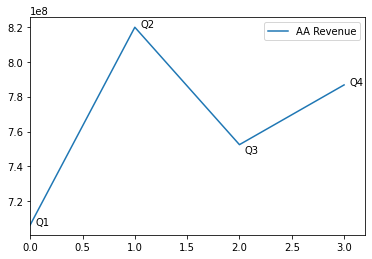

In [0]:
#revenue by quarter for AA
aa_rev = [quarter_rev(1, aa_fare),quarter_rev(2, aa_fare),quarter_rev(3, aa_fare),quarter_rev(4, aa_fare)]
plt.plot(aa_rev,label = "AA Revenue")
plt.text(0.05,aa_rev[0],'Q1')
plt.text(1.05,aa_rev[1],'Q2')
plt.text(2.05,aa_rev[2]-5000000,'Q3')
plt.text(3.05,aa_rev[3],'Q4')
plt.legend()
plt.xlim(0,3.2)

In [0]:
quarter_rev(1, aa_fare),quarter_rev(2, aa_fare),quarter_rev(3, aa_fare),quarter_rev(4, aa_fare)
#quarter 2 most revenue

(706493640.0, 819721540.0, 752466610.0, 786687090.0)

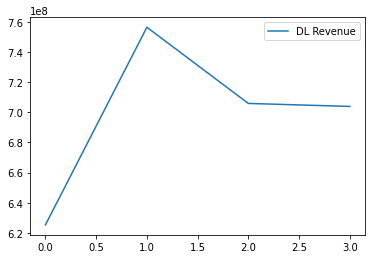

In [0]:
#revenue by quarter for Delta
dl_rev = [quarter_rev(1, dl_fare),quarter_rev(2, dl_fare),quarter_rev(3, dl_fare),quarter_rev(4, dl_fare)]
plt.plot([quarter_rev(1, dl_fare),quarter_rev(2, dl_fare),quarter_rev(3, dl_fare),quarter_rev(4, dl_fare)],label = "DL Revenue")
plt.legend()

In [0]:
# categorical: revenue vs. quarter
# are the distribution of passenger counts in bins similar across quarters? (if we should include a quarter indicator in linear regression)
# thoughts: split the whole bin range by 100$, 100, 200,...2500, compare the distributions? 

In [0]:
aa_bin_df = pd.DataFrame({"AA_Q1":aa_q1_bins,"AA_Q2":aa_q2_bins,"AA_Q3":aa_q3_bins,"AA_Q4":aa_q4_bins})
aa_bin_df.head()

,AA_Q1,AA_Q2,AA_Q3,AA_Q4
10,115236,118217,130818,137888
20,153882,157104,164832,172550
30,166169,171225,178281,184137
40,164336,174162,173655,181945
50,160966,169429,169034,172558


In [0]:
sum(aa_q1_bins),sum(aa_q2_bins),sum(aa_q3_bins),sum(aa_q4_bins)

(3337454, 3674642, 3538025, 3694283)

0.0


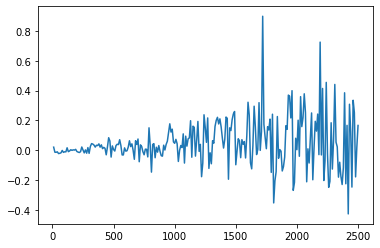

In [0]:
from scipy import stats
chi2, p, dof, expected = stats.chi2_contingency(aa_bin_df)
error1 = (expected [:,0] - aa_bin_df["AA_Q1"])/aa_bin_df["AA_Q1"]
print(p)
plt.plot(price_bins,error1)

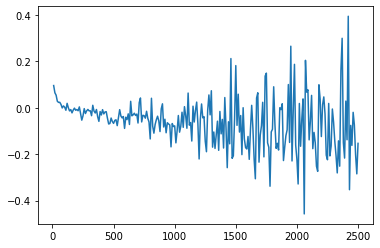

In [0]:
error2 = (expected [:,1] - aa_bin_df["AA_Q2"])/aa_bin_df["AA_Q2"]
plt.plot(price_bins,error2)

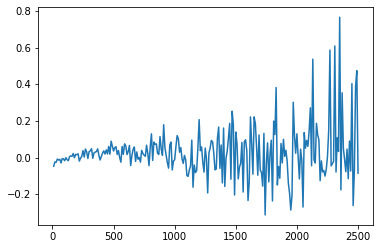

In [0]:
error3 = (expected [:,2] - aa_bin_df["AA_Q3"])/aa_bin_df["AA_Q3"]
plt.plot(price_bins,error3)

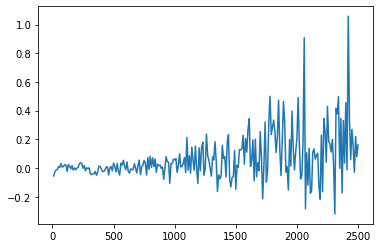

In [0]:
error4 = (expected [:,3] - aa_bin_df["AA_Q4"])/aa_bin_df["AA_Q4"]
plt.plot(price_bins,error4)

In [0]:
np.mean(error1),np.mean(error2),np.mean(error3),np.mean(error4)

(0.04971425358842041,
 -0.06073765555046967,
 0.02734550222990227,
 0.06525838398071694)

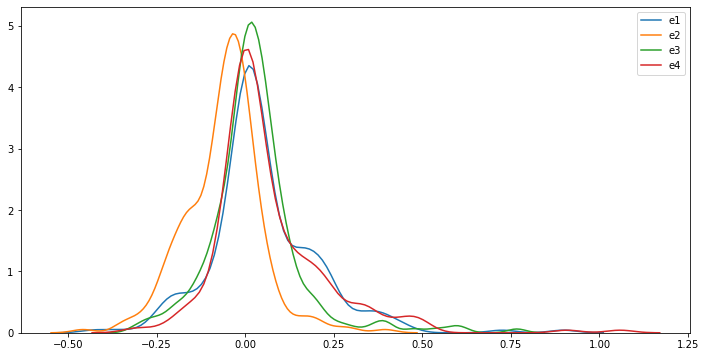

In [0]:
plt.figure(figsize = (12,6))
sns.kdeplot(error1, label = "e1")
sns.kdeplot(error2, label = "e2")
sns.kdeplot(error3, label = "e3")
sns.kdeplot(error4, label = "e4")

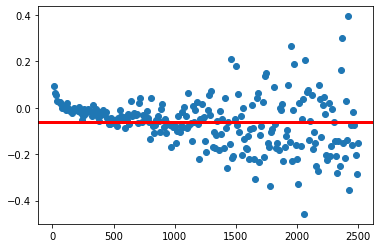

In [0]:
#negative erros indicate more concentration 
plt.scatter(price_bins, error2)
plt.axhline(y = np.mean(error2),linewidth=3, color='r')

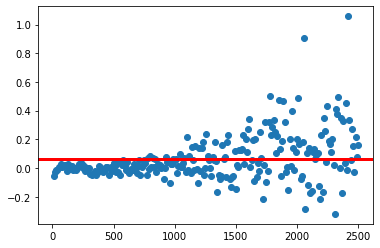

In [0]:
plt.scatter(price_bins, error4)
plt.axhline(y = np.mean(error4),linewidth=3, color='r')

From the above analysis, the distribution of number of people in each bin is significantly different, and we particularly want to focus on highest revenue quarter which is quarter 2 for AA (and for most of the other airlines), here we can see that most of the negative relative errors for quarter to are clustered at bins from 1500-2500, which makes sense since if more people are paying higher prices during that quarter than the revenue would go up, I do the percentages here since the total number of people in each quarter is different. Also for quarter four, which also has higher revenues, seems like most negative erros are clustered at lower buckets, indicating there might be more discouts going on and more purchases in that quarter

In [0]:
quarter = []
for i in flight['month']:
  if i <= 3:
    quarter.append(1)
  elif i <= 6:
    quarter.append(2)
  elif i <= 9:
    quarter.append(3)
  else:
    quarter.append(4)
flight['quarter'] = quarter 
flight['flight_route'] = flight['origin_airport'] + ' --> ' + flight['destination_airport']

In [0]:
flight.head()

,year,month,day,airline_id,origin_airport,destination_airport,scheduled_departure,actual_departure,taxi_out,wheels_off,wheels_on,taxi_in,scheduled_arrival,actual_arrival,cancelled,diverted,scheduled_elapsed,actual_elapsed,distance,airline_delay,weather_delay,air_system_delay,security_delay,aircraft_delay,quarter,flight_route
0,2017,1,31,AA,CLT,PHX,1619,1615.0,18.0,1633.0,1829.0,7.0,1856,1836.0,0,0,277.0,261.0,1773,NaN,NaN,NaN,NaN,NaN,1,CLT --> PHX
1,2017,1,12,AA,FLL,CLT,1305,1256.0,24.0,1320.0,1456.0,9.0,1508,1505.0,0,0,123.0,129.0,632,NaN,NaN,NaN,NaN,NaN,1,FLL --> CLT
2,2017,1,14,AA,FLL,CLT,1305,1314.0,11.0,1325.0,1455.0,7.0,1508,1502.0,0,0,123.0,108.0,632,NaN,NaN,NaN,NaN,NaN,1,FLL --> CLT
3,2017,1,18,AA,FLL,CLT,1305,1304.0,19.0,1323.0,1508.0,5.0,1508,1513.0,0,0,123.0,129.0,632,NaN,NaN,NaN,NaN,NaN,1,FLL --> CLT
4,2017,1,25,AA,FLL,CLT,1305,1301.0,11.0,1312.0,1449.0,8.0,1508,1457.0,0,0,123.0,116.0,632,NaN,NaN,NaN,NaN,NaN,1,FLL --> CLT


In [0]:
grouped = flight[["airline_id","quarter","destination_airport"]].groupby(["airline_id","quarter","destination_airport"]).agg(len).reset_index().rename(columns={0:"flight_counts"})

In [0]:
grouped

,airline_id,quarter,destination_airport,flight_counts
0,AA,1,ABQ,44
1,AA,1,ALB,30
2,AA,1,AMA,5
3,AA,1,ATL,374
4,AA,1,AUS,233
...,...,...,...,...
4235,WN,4,SNA,423
4236,WN,4,STL,910
4237,WN,4,TPA,648
4238,WN,4,TUL,125


In [0]:
fares.columns

Index(['quarter', 'airline_id', 'origin_airport', 'destination_airport',
       'distance', '10', '20', '30', '40', '50',
       ...
       '2410', '2420', '2430', '2440', '2450', '2460', '2470', '2480', '2490',
       '2500'],
      dtype='object', length=255)

In [0]:
prices = fares.iloc[:,5:]
prices.head()


,10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170,180,190,200,210,220,230,240,250,260,270,280,290,300,310,320,330,340,350,360,370,380,390,400,...,2110,2120,2130,2140,2150,2160,2170,2180,2190,2200,2210,2220,2230,2240,2250,2260,2270,2280,2290,2300,2310,2320,2330,2340,2350,2360,2370,2380,2390,2400,2410,2420,2430,2440,2450,2460,2470,2480,2490,2500
0,2,6,11,15,32,34,43,47,38,40,26,26,19,19,16,25,18,14,18,13,14,7,13,19,5,8,5,3,3,7,9,1,4,3,6,2,2,3,5,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,13,4,3,2,8,12,24,14,12,12,21,20,19,35,36,36,36,45,37,74,41,52,86,31,37,32,36,66,32,37,37,26,19,25,29,35,119,27,27,36,...,0,0,1,0,0,0,0,0,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,5,0,0,0,0,0,0,28
2,7,11,14,36,52,54,40,41,35,42,42,18,24,16,17,14,10,12,12,13,8,4,3,6,5,6,7,4,0,6,3,1,2,3,2,0,5,4,1,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2573,1665,927,556,356,227,123,87,53,38,36,22,14,8,7,10,3,6,2,4,1,2,1,2,1,0,0,0,1,1,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,112,186,379,650,799,678,739,644,582,445,446,316,254,233,222,232,165,133,103,87,89,90,82,64,47,49,37,35,40,41,18,18,22,22,33,13,5,7,9,12,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
row_rev = np.array([])
num_ppl = np.array([])


for index, row in prices.iterrows():
  row_rev = np.append(row_rev,sum(np.asarray(row).astype(np.int) * price_bins))
  num_ppl = np.append(num_ppl, sum(np.asarray(row).astype(np.int)))

num_ppl

array([6.110e+02, 2.232e+03, 5.940e+02, ..., 1.000e+00, 1.000e+00,
       1.000e+00])

In [0]:
fares["route_revenue"] = row_rev
fares["passenger_counts"] = num_ppl
fares.head()

,quarter,airline_id,origin_airport,destination_airport,distance,10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170,180,190,200,210,220,230,240,250,260,270,280,290,300,310,320,330,340,350,...,2130,2140,2150,2160,2170,2180,2190,2200,2210,2220,2230,2240,2250,2260,2270,2280,2290,2300,2310,2320,2330,2340,2350,2360,2370,2380,2390,2400,2410,2420,2430,2440,2450,2460,2470,2480,2490,2500,route_revenue,passenger_counts
0,1,AA,CLT,SGF,708,2,6,11,15,32,34,43,47,38,40,26,26,19,19,16,25,18,14,18,13,14,7,13,19,5,8,5,3,3,7,9,1,4,3,6,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,98510.0,611.0
1,1,DL,DTW,SAN,1956,13,4,3,2,8,12,24,14,12,12,21,20,19,35,36,36,36,45,37,74,41,52,86,31,37,32,36,66,32,37,37,26,19,25,29,...,1,0,0,0,0,0,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,5,0,0,0,0,0,0,28,1041350.0,2232.0
2,1,DL,MSP,ISN,546,7,11,14,36,52,54,40,41,35,42,42,18,24,16,17,14,10,12,12,13,8,4,3,6,5,6,7,4,0,6,3,1,2,3,2,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,74660.0,594.0
3,1,AA,CLT,RDU,130,2573,1665,927,556,356,227,123,87,53,38,36,22,14,8,7,10,3,6,2,4,1,2,1,2,1,0,0,0,1,1,3,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,183630.0,6731.0
4,1,DL,ATL,RIC,481,112,186,379,650,799,678,739,644,582,445,446,316,254,233,222,232,165,133,103,87,89,90,82,64,47,49,37,35,40,41,18,18,22,22,33,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,910770.0,8282.0


In [0]:
grouped_route = flight[["airline_id","quarter","flight_route"]].groupby(["airline_id","quarter","flight_route"]).agg(len).reset_index().rename(columns={0:"flight_counts"})
grouped_route

,airline_id,quarter,flight_route,flight_counts
0,AA,1,ABQ --> DFW,38
1,AA,1,ALB --> CLT,17
2,AA,1,AMA --> DFW,5
3,AA,1,ATL --> CLT,69
4,AA,1,ATL --> DFW,58
...,...,...,...,...
26520,WN,4,TUS --> LAS,24
26521,WN,4,TUS --> LAX,29
26522,WN,4,TUS --> MDW,8
26523,WN,4,TUS --> OAK,2


In [0]:
aa_routes = grouped_route[grouped_route["airline_id"]=="AA"]
aa_routes

,airline_id,quarter,flight_route,flight_counts
0,AA,1,ABQ --> DFW,38
1,AA,1,ALB --> CLT,17
2,AA,1,AMA --> DFW,5
3,AA,1,ATL --> CLT,69
4,AA,1,ATL --> DFW,58
...,...,...,...,...
2699,AA,4,TUL --> MIA,3
2700,AA,4,TUL --> ORD,2
2701,AA,4,TUS --> DFW,55
2702,AA,4,TUS --> ORD,17


In [0]:
routes_overall = flight[["airline_id","flight_route"]].groupby(["airline_id","flight_route"]).agg(len).reset_index().rename(columns={0:"flight_counts"})
routes_overall
aa_overall_routes = routes_overall[routes_overall["airline_id"] == "AA"]
#combined quarters
aa_overall_routes 

,airline_id,flight_route,flight_counts
0,AA,ABQ --> DFW,180
1,AA,ABQ --> ORD,9
2,AA,ALB --> CLT,90
3,AA,AMA --> DFW,24
4,AA,ANC --> DFW,6
...,...,...,...
751,AA,TUS --> DFW,248
752,AA,TUS --> JFK,12
753,AA,TUS --> ORD,74
754,AA,VPS --> DFW,31


In [0]:
756*4

3024

In [0]:
fares.head()

,quarter,airline_id,origin_airport,destination_airport,distance,10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170,180,190,200,210,220,230,240,250,260,270,280,290,300,310,320,330,340,350,...,2130,2140,2150,2160,2170,2180,2190,2200,2210,2220,2230,2240,2250,2260,2270,2280,2290,2300,2310,2320,2330,2340,2350,2360,2370,2380,2390,2400,2410,2420,2430,2440,2450,2460,2470,2480,2490,2500,route_revenue,passenger_counts
0,1,AA,CLT,SGF,708,2,6,11,15,32,34,43,47,38,40,26,26,19,19,16,25,18,14,18,13,14,7,13,19,5,8,5,3,3,7,9,1,4,3,6,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,98510.0,611.0
1,1,DL,DTW,SAN,1956,13,4,3,2,8,12,24,14,12,12,21,20,19,35,36,36,36,45,37,74,41,52,86,31,37,32,36,66,32,37,37,26,19,25,29,...,1,0,0,0,0,0,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,5,0,0,0,0,0,0,28,1041350.0,2232.0
2,1,DL,MSP,ISN,546,7,11,14,36,52,54,40,41,35,42,42,18,24,16,17,14,10,12,12,13,8,4,3,6,5,6,7,4,0,6,3,1,2,3,2,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,74660.0,594.0
3,1,AA,CLT,RDU,130,2573,1665,927,556,356,227,123,87,53,38,36,22,14,8,7,10,3,6,2,4,1,2,1,2,1,0,0,0,1,1,3,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,183630.0,6731.0
4,1,DL,ATL,RIC,481,112,186,379,650,799,678,739,644,582,445,446,316,254,233,222,232,165,133,103,87,89,90,82,64,47,49,37,35,40,41,18,18,22,22,33,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,910770.0,8282.0


In [0]:
#can add routes column to fares as well
fares['flight_route'] = fares['origin_airport'] + ' --> ' + fares['destination_airport']
routes_fare = fares[["quarter","airline_id","origin_airport","destination_airport","distance","route_revenue","passenger_counts","flight_route"]]
aa_routes_fare = routes_fare[routes_fare["airline_id"] == "AA"]
aa_routes_fare.sort_values("distance",ascending = False)

,quarter,airline_id,origin_airport,destination_airport,distance,route_revenue,passenger_counts,flight_route
70993,4,AA,CLT,HNL,4678,46320.0,40.0,CLT --> HNL
72377,4,AA,ORD,KOA,4213,11550.0,8.0,ORD --> KOA
68419,4,AA,LIH,DFW,3847,304600.0,305.0,LIH --> DFW
69063,4,AA,DFW,LIH,3847,268630.0,336.0,DFW --> LIH
25530,2,AA,HNL,DFW,3784,2950660.0,3469.0,HNL --> DFW
...,...,...,...,...,...,...,...,...
71024,4,AA,STX,STT,45,50.0,5.0,STX --> STT
57005,3,AA,STX,STT,45,40.0,3.0,STX --> STT
30040,2,AA,STT,STX,45,70.0,5.0,STT --> STX
57468,3,AA,STT,STX,45,10.0,1.0,STT --> STX


In [0]:
tripid = []
for index, row in aa_routes_fare.iterrows():
  if (row["origin_airport"] + " <-> " + row["destination_airport"] in tripid) or (row["destination_airport"] + " <-> " + row["origin_airport"] in tripid):
    temp = ""
    if row["origin_airport"] + " <-> " + row["destination_airport"] in tripid:
      tripid.append(row["origin_airport"] + " <-> " + row["destination_airport"])
    else:
      tripid.append(row["destination_airport"] + " <-> " + row["origin_airport"])
  else:
    tripid.append(row["origin_airport"] + " <-> " + row["destination_airport"])
aa_routes_fare["trip"] = tripid 
aa_routes_fare.sort_values("distance",ascending = False)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


,quarter,airline_id,origin_airport,destination_airport,distance,route_revenue,passenger_counts,flight_route,trip
70993,4,AA,CLT,HNL,4678,46320.0,40.0,CLT --> HNL,CLT <-> HNL
72377,4,AA,ORD,KOA,4213,11550.0,8.0,ORD --> KOA,ORD <-> KOA
68419,4,AA,LIH,DFW,3847,304600.0,305.0,LIH --> DFW,LIH <-> DFW
69063,4,AA,DFW,LIH,3847,268630.0,336.0,DFW --> LIH,LIH <-> DFW
25530,2,AA,HNL,DFW,3784,2950660.0,3469.0,HNL --> DFW,DFW <-> HNL
...,...,...,...,...,...,...,...,...,...
71024,4,AA,STX,STT,45,50.0,5.0,STX --> STT,STT <-> STX
57005,3,AA,STX,STT,45,40.0,3.0,STX --> STT,STT <-> STX
30040,2,AA,STT,STX,45,70.0,5.0,STT --> STX,STT <-> STX
57468,3,AA,STT,STX,45,10.0,1.0,STT --> STX,STT <-> STX


In [0]:
aa_routes_fare_overall = aa_routes_fare [["route_revenue","distance","flight_route"]].groupby(["flight_route"]).agg({"distance":lambda x:x.iloc[0],"route_revenue":sum}).reset_index()
aa_routes_fare_overall[aa_routes_fare_overall["flight_route"]=="SFO --> DFW"]
aa_routes_fare_overall

,flight_route,distance,route_revenue
0,ABE --> CLE,339,220.0
1,ABE --> CLT,481,567550.0
2,ABE --> PHL,55,21490.0
3,ABI --> DFW,158,258770.0
4,ABQ --> ATL,1269,330.0
...,...,...,...
3356,YUM --> FLG,240,30.0
3357,YUM --> GJT,561,150.0
3358,YUM --> LBB,744,1500.0
3359,YUM --> PHX,160,250390.0


In [0]:
aa_routefare_by_trip = aa_routes_fare [["route_revenue","distance","trip"]].groupby(["trip"]).agg({"distance":lambda x:x.iloc[0],"route_revenue":sum}).reset_index()
top_rev_trips = aa_routefare_by_trip.sort_values("route_revenue",ascending=False).head(15)["trip"]
top_rev_trips

588     DFW <-> LAX
1585    PHX <-> CLT
1404    ORD <-> LAX
952     JFK <-> LAX
593     DFW <-> LGA
1017    LAX <-> MIA
1540    PHL <-> LAX
1622    PHX <-> ORD
632     DFW <-> SFO
631     DFW <-> SEA
997     LAX <-> CLT
1625    PHX <-> PHL
1891    SFO <-> CLT
628     DFW <-> SAN
617     DFW <-> PHL
Name: trip, dtype: object

In [0]:
aa_rev_total = sum(np.asarray(aa_rev))
aa_rev_total 
percent_total = aa_routes_fare_overall["route_revenue"]/aa_rev_total
aa_routes_fare_overall["percent_total"] = percent_total
aa_overall_sorted_by_rev = aa_routes_fare_overall.sort_values("percent_total",ascending = False)
aa_overall_sorted_by_rev.head(10) #top 10 most revenue route

,flight_route,distance,route_revenue,percent_total
1600,LAX --> DFW,1235,20042280.0,0.006538
924,DFW --> LAX,1235,19461620.0,0.006349
618,CLT --> PHX,1773,19134720.0,0.006242
1631,LAX --> ORD,1744,19024620.0,0.006206
2490,PHX --> CLT,1773,18785280.0,0.006128
2232,ORD --> LAX,1744,18323020.0,0.005977
1524,JFK --> LAX,2475,18036380.0,0.005884
1613,LAX --> JFK,2475,17874490.0,0.005831
1689,LGA --> DFW,1389,17459850.0,0.005696
929,DFW --> LGA,1389,17165760.0,0.005600


In [0]:
#target those 15 find single trip
top_one_way_trip = aa_routes_fare[aa_routes_fare["trip"].isin(top_rev_trips)]
top_one_way_trip

,quarter,airline_id,origin_airport,destination_airport,distance,route_revenue,passenger_counts,flight_route,trip
48,1,AA,DFW,SFO,1464,3344790.0,10028.0,DFW --> SFO,DFW <-> SFO
85,1,AA,PHX,CLT,1773,4922020.0,10764.0,PHX --> CLT,PHX <-> CLT
123,1,AA,PHL,LAX,2402,3861860.0,6262.0,PHL --> LAX,PHL <-> LAX
163,1,AA,LAX,MIA,2342,4452780.0,8156.0,LAX --> MIA,LAX <-> MIA
370,1,AA,DFW,LAX,1235,4395560.0,15061.0,DFW --> LAX,DFW <-> LAX
...,...,...,...,...,...,...,...,...,...
65944,4,AA,PHL,PHX,2075,3611690.0,7204.0,PHL --> PHX,PHX <-> PHL
66400,4,AA,LAX,JFK,2475,4955890.0,8083.0,LAX --> JFK,JFK <-> LAX
66753,4,AA,CLT,PHX,1773,4765460.0,11659.0,CLT --> PHX,PHX <-> CLT
66764,4,AA,PHX,PHL,2075,3705070.0,7011.0,PHX --> PHL,PHX <-> PHL


In [0]:
top_trips_formatted = top_one_way_trip[["quarter", "route_revenue", "passenger_counts","flight_route","trip"]].groupby(["quarter","trip","flight_route"]).sum().reset_index()
top_trips_formatted

,quarter,trip,flight_route,route_revenue,passenger_counts
0,1,DFW <-> LAX,DFW --> LAX,4395560.0,15061.0
1,1,DFW <-> LAX,LAX --> DFW,4439060.0,14407.0
2,1,DFW <-> LGA,DFW --> LGA,3441570.0,10384.0
3,1,DFW <-> LGA,LGA --> DFW,3575540.0,10270.0
4,1,DFW <-> PHL,DFW --> PHL,2805030.0,9264.0
...,...,...,...,...,...
115,4,PHX <-> ORD,PHX --> ORD,4014360.0,11829.0
116,4,PHX <-> PHL,PHL --> PHX,3611690.0,7204.0
117,4,PHX <-> PHL,PHX --> PHL,3705070.0,7011.0
118,4,SFO <-> CLT,CLT --> SFO,3721070.0,6828.0


In [0]:
top_trips_formatted_by_trip = top_trips_formatted[["quarter","trip","route_revenue","passenger_counts"]].groupby(["quarter","trip"]).sum().reset_index()
top_trips_formatted_by_trip
avg_price_round = top_trips_formatted_by_trip["route_revenue"]/top_trips_formatted_by_trip["passenger_counts"]
#len(np.tile(np.asarray(np.repeat(avg_price_round,2)),4))
top_trips_formatted_by_trip

,quarter,trip,route_revenue,passenger_counts
0,1,DFW <-> LAX,8834620.0,29468.0
1,1,DFW <-> LGA,7017110.0,20654.0
2,1,DFW <-> PHL,5775590.0,18249.0
3,1,DFW <-> SAN,6045380.0,21230.0
4,1,DFW <-> SEA,5999830.0,14450.0
5,1,DFW <-> SFO,6657540.0,19448.0
6,1,JFK <-> LAX,8718200.0,13485.0
7,1,LAX <-> CLT,6957350.0,13823.0
8,1,LAX <-> MIA,9094990.0,16618.0
9,1,ORD <-> LAX,8495440.0,19708.0


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text major ticklabel objects>)

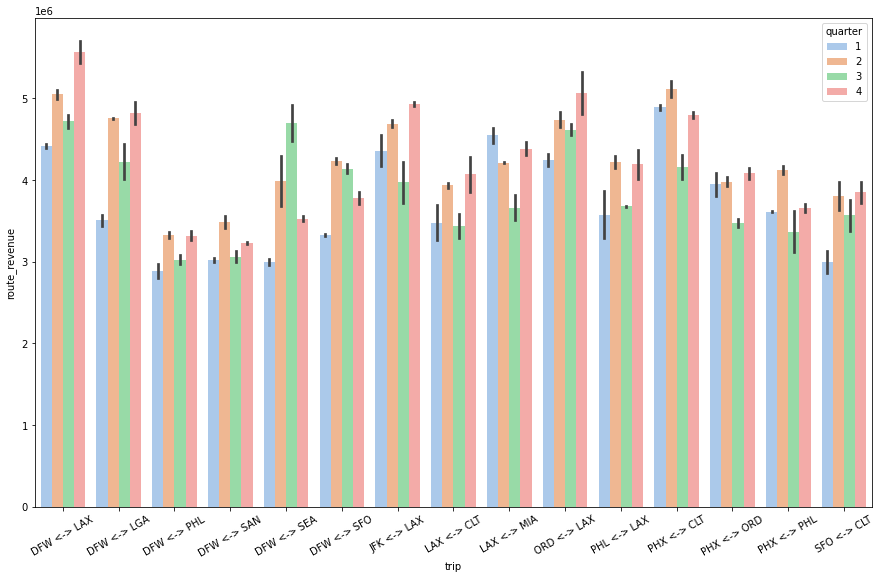

In [0]:
plt.figure(figsize=(15,9))
sns.barplot("trip","route_revenue",hue = "quarter",data=top_trips_formatted,palette = sns.color_palette("pastel"))
plt.xticks(rotation=30)

In [0]:
top_trips_formatted["avg_price_per_seat_one_way"] = top_trips_formatted["route_revenue"]/top_trips_formatted["passenger_counts"]
top_trips_formatted["avg_price_per_seat_round "] = np.asarray(np.repeat(avg_price_round,2))
top_trips_formatted

,quarter,trip,flight_route,route_revenue,passenger_counts,avg_price_per_seat_one_way,avg_price_per_seat_round
0,1,DFW <-> LAX,DFW --> LAX,4395560.0,15061.0,291.850475,299.803855
1,1,DFW <-> LAX,LAX --> DFW,4439060.0,14407.0,308.118276,299.803855
2,1,DFW <-> LGA,DFW --> LGA,3441570.0,10384.0,331.430085,339.745812
3,1,DFW <-> LGA,LGA --> DFW,3575540.0,10270.0,348.153846,339.745812
4,1,DFW <-> PHL,DFW --> PHL,2805030.0,9264.0,302.788212,316.488027
...,...,...,...,...,...,...,...
115,4,PHX <-> ORD,PHX --> ORD,4014360.0,11829.0,339.365965,346.739851
116,4,PHX <-> PHL,PHL --> PHX,3611690.0,7204.0,501.345086,514.721069
117,4,PHX <-> PHL,PHX --> PHL,3705070.0,7011.0,528.465269,514.721069
118,4,SFO <-> CLT,CLT --> SFO,3721070.0,6828.0,544.972173,555.168734


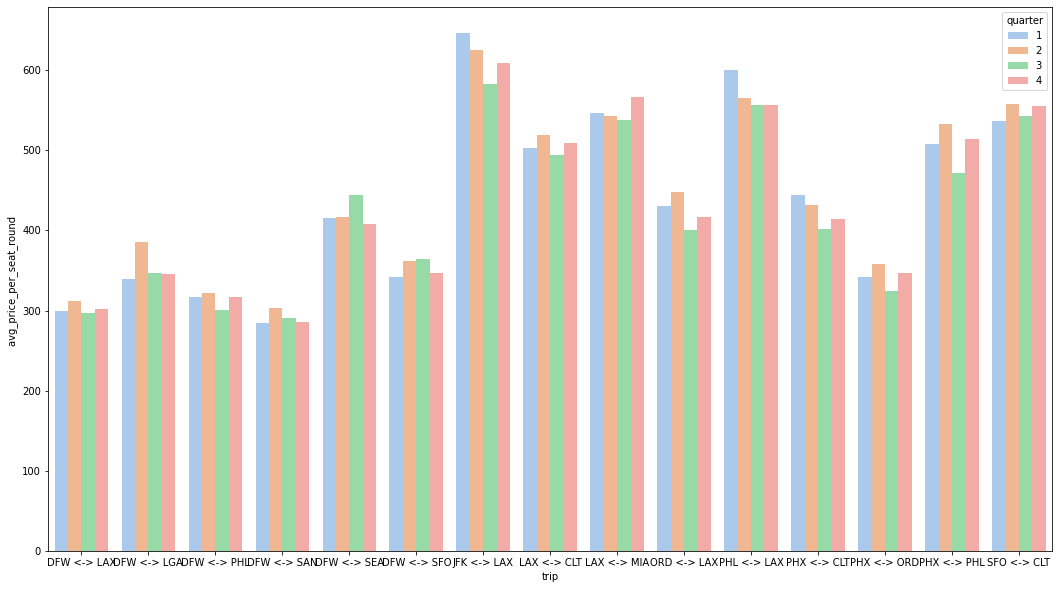

In [0]:
plt.figure(figsize=(18,10))
sns.barplot("trip","avg_price_per_seat_round ",hue = "quarter",data=top_trips_formatted,palette = sns.color_palette("pastel"))
#higher avg price per seat != higher total revenue

In [0]:
def diff_by_trip(trip,table,typeofplot):
  trip_tbl = table[table["trip"] == trip]
  #sns.barplot("trip","avg_price_per_seat_one_way",hue = "flight_route",data=trip_tbl)
  abs_diff_percent = abs(np.asarray(trip_tbl["avg_price_per_seat_one_way"])[0]-np.asarray(trip_tbl["avg_price_per_seat_one_way"])[1])/min(np.asarray(trip_tbl["avg_price_per_seat_one_way"])[0],np.asarray(trip_tbl["avg_price_per_seat_one_way"])[1])
  abs_diff_percent_rev = abs(np.asarray(trip_tbl["route_revenue"])[0]-np.asarray(trip_tbl["route_revenue"])[1])/min(np.asarray(trip_tbl["route_revenue"])[0],np.asarray(trip_tbl["route_revenue"])[1])
  if abs_diff_percent_rev > 0.05:
    print(trip)
    print(np.asarray(trip_tbl["avg_price_per_seat_one_way"])[0],np.asarray(trip_tbl["avg_price_per_seat_one_way"])[1])
    print("avg price difference:",abs_diff_percent)
    print("revenue difference:",abs_diff_percent_rev)
  #sns.barplot("trip",typeofplot,hue = "flight_route",data=trip_tbl)


In [0]:
top_trips_formatted_combined_by_trip = top_trips_formatted[["trip","route_revenue","passenger_counts"]].groupby("trip").sum().reset_index()
top_trips_formatted_combined_by_trip
overall_avg_price_round = top_trips_formatted_combined_by_trip["route_revenue"]/top_trips_formatted_combined_by_trip["passenger_counts"]
overall_avg_price_round

0     302.832546
1     354.708811
2     313.873128
3     291.180741
4     422.640718
5     354.706799
6     615.966895
7     507.181636
8     548.840864
9     423.361030
10    568.520649
11    423.635084
12    342.939998
13    507.603569
14    549.042177
dtype: float64

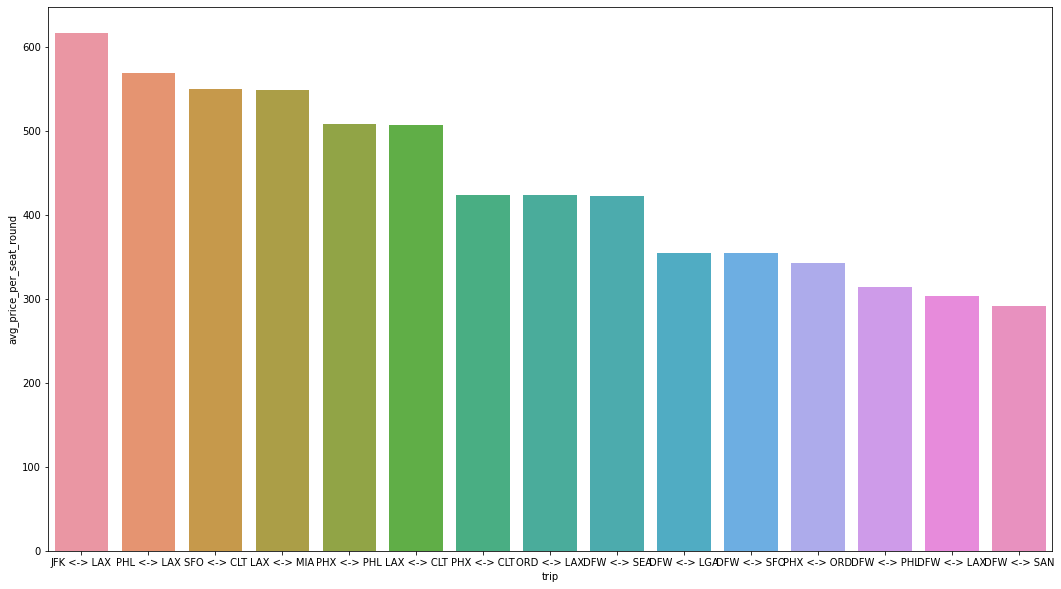

In [0]:
top_trips_formatted_combined = top_trips_formatted[["trip","flight_route","route_revenue","passenger_counts"]].groupby(["trip","flight_route"]).sum().reset_index()
top_trips_formatted_combined["avg_price_per_seat_one_way"] = top_trips_formatted_combined["route_revenue"]/top_trips_formatted_combined["passenger_counts"]
top_trips_formatted_combined["avg_price_per_seat_round"] = np.asarray(np.repeat(overall_avg_price_round,2))
plt.figure(figsize=(18,10))
sns.barplot("trip","avg_price_per_seat_round",data=top_trips_formatted_combined.sort_values("avg_price_per_seat_round", ascending=False))

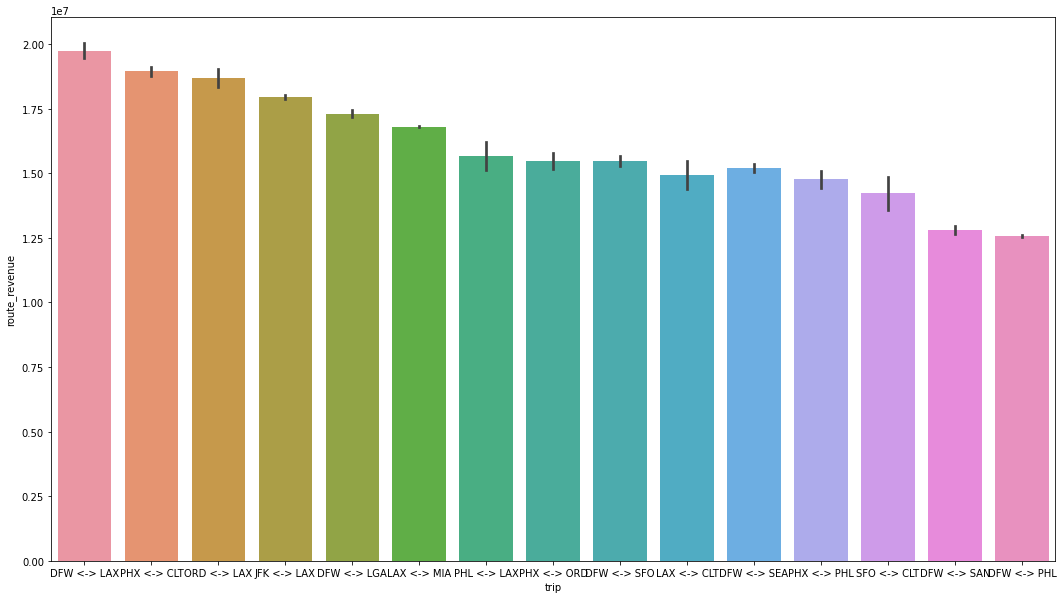

In [0]:
plt.figure(figsize=(18,10))
sns.barplot("trip","route_revenue",data=top_trips_formatted_combined.sort_values("route_revenue", ascending=False))

In [0]:
top_trips_formatted_combined

,trip,flight_route,route_revenue,passenger_counts,avg_price_per_seat_one_way,avg_price_per_seat_round
0,DFW <-> LAX,DFW --> LAX,19461620.0,65712.0,296.165388,302.832546
1,DFW <-> LAX,LAX --> DFW,20042280.0,64736.0,309.600222,302.832546
2,DFW <-> LGA,DFW --> LGA,17165760.0,49123.0,349.444456,354.708811
3,DFW <-> LGA,LGA --> DFW,17459850.0,48494.0,360.041448,354.708811
4,DFW <-> PHL,DFW --> PHL,12518590.0,40685.0,307.695465,313.873128
5,DFW <-> PHL,PHL --> DFW,12606640.0,39364.0,320.258104,313.873128
6,DFW <-> SAN,DFW --> SAN,12641480.0,44392.0,284.769328,291.180741
7,DFW <-> SAN,SAN --> DFW,12946610.0,43485.0,297.725882,291.180741
8,DFW <-> SEA,DFW --> SEA,15364730.0,36822.0,417.270382,422.640718
9,DFW <-> SEA,SEA --> DFW,15060330.0,35166.0,428.263948,422.640718


In [0]:

for index,row in top_trips_formatted_combined.iterrows():
  #print(row["trip"])
  
  diff_by_trip(row["trip"],top_trips_formatted_combined,"route_revenue")

LAX <-> CLT
503.17803136376364 510.96087761036216
avg price difference: 0.015467380850282101
revenue difference: 0.0757527588229115
LAX <-> CLT
503.17803136376364 510.96087761036216
avg price difference: 0.015467380850282101
revenue difference: 0.0757527588229115
PHL <-> LAX
563.4803976320786 573.3122146320744
avg price difference: 0.017448374497697122
revenue difference: 0.07025462320575743
PHL <-> LAX
563.4803976320786 573.3122146320744
avg price difference: 0.017448374497697122
revenue difference: 0.07025462320575743
SFO <-> CLT
541.180569380848 556.4398651180218
avg price difference: 0.028196311176935853
revenue difference: 0.09267607188184009
SFO <-> CLT
541.180569380848 556.4398651180218
avg price difference: 0.028196311176935853
revenue difference: 0.09267607188184009


In [0]:
top_trips_formatted_combined.head()

,trip,flight_route,route_revenue,passenger_counts,avg_price_per_seat_one_way,avg_price_per_seat_round
0,DFW <-> LAX,DFW --> LAX,19461620.0,65712.0,296.165388,302.832546
1,DFW <-> LAX,LAX --> DFW,20042280.0,64736.0,309.600222,302.832546
2,DFW <-> LGA,DFW --> LGA,17165760.0,49123.0,349.444456,354.708811
3,DFW <-> LGA,LGA --> DFW,17459850.0,48494.0,360.041448,354.708811
4,DFW <-> PHL,DFW --> PHL,12518590.0,40685.0,307.695465,313.873128


In [0]:
#routes_fare = fares[["quarter","airline_id","origin_airport","destination_airport","distance","route_revenue","passenger_counts","flight_route"]]
def avg_price_vs_rev(airline_id):
  airline_fare = routes_fare[routes_fare["airline_id"] == airline_id]
  tripid = []
  for index, row in airline_fare.iterrows():
    if (row["origin_airport"] + " <-> " + row["destination_airport"] in tripid) or (row["destination_airport"] + " <-> " + row["origin_airport"] in tripid):
      temp = ""
      if row["origin_airport"] + " <-> " + row["destination_airport"] in tripid:
        tripid.append(row["origin_airport"] + " <-> " + row["destination_airport"])
      else:
        tripid.append(row["destination_airport"] + " <-> " + row["origin_airport"])
    else:
      tripid.append(row["origin_airport"] + " <-> " + row["destination_airport"])
  airline_fare["trip"] = tripid 
  routefare_by_trip = airline_fare[["route_revenue","distance","trip"]].groupby(["trip"]).agg({"distance":lambda x:x.iloc[0],"route_revenue":sum}).reset_index()
  top_rev_trips = routefare_by_trip.sort_values("route_revenue",ascending=False).head(15)["trip"]
  top_one_way_trip = airline_fare[airline_fare["trip"].isin(top_rev_trips)]
  top_trips_formatted = top_one_way_trip[["quarter", "route_revenue", "passenger_counts","flight_route","trip"]].groupby(["quarter","trip","flight_route"]).sum().reset_index()
  top_trips_formatted_by_trip = top_trips_formatted[["quarter","trip","route_revenue","passenger_counts"]].groupby(["quarter","trip"]).sum().reset_index()
  avg_price_round = top_trips_formatted_by_trip["route_revenue"]/top_trips_formatted_by_trip["passenger_counts"]
  
  top_trips_formatted["avg_price_per_seat_one_way"] = top_trips_formatted["route_revenue"]/top_trips_formatted["passenger_counts"]
  top_trips_formatted["avg_price_per_seat_round "] = np.asarray(np.repeat(avg_price_round,2))
  top_trips_formatted_combined = top_trips_formatted[["trip","flight_route","route_revenue","passenger_counts"]].groupby(["trip","flight_route"]).sum().reset_index()
  top_trips_formatted_combined["avg_price_per_seat_one_way"] = top_trips_formatted_combined["route_revenue"]/top_trips_formatted_combined["passenger_counts"]
  top_trips_formatted_combined["avg_price_per_seat_round"] = np.asarray(np.repeat(overall_avg_price_round,2))
  fig,axes = plt.subplots(nrows=2,ncols=1,figsize=(15,9))
  for ax in axes:
    plt.sca(ax)
    plt.xticks(rotation=20)
  sns.barplot("trip","route_revenue",data=top_trips_formatted_combined.sort_values("route_revenue", ascending=False),ax=axes[0])
  sns.barplot("trip","avg_price_per_seat_round",data=top_trips_formatted_combined.sort_values("route_revenue", ascending=False),ax=axes[1])
  #sns.barplot("trip",column,data=top_trips_formatted_combined.sort_values(column, ascending=False),ax=axes[1])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


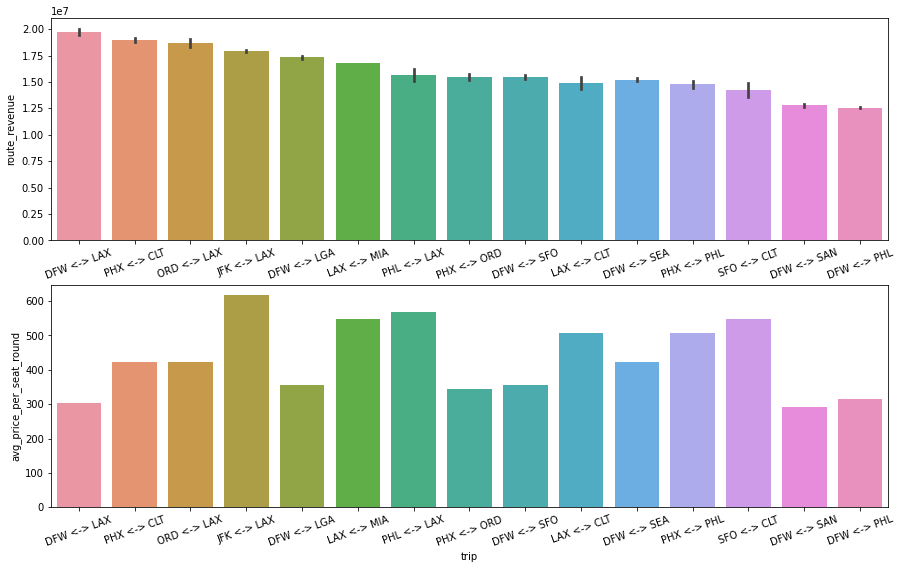

In [0]:
avg_price_vs_rev("AA")

In [0]:
aa_overall_sorted_by_dist = aa_routes_fare_overall.sort_values("distance",ascending = False)
aa_overall_sorted_by_dist.head(10)

,flight_route,distance,route_revenue,percent_total
575,CLT --> HNL,4678,46320.0,1.511074e-05
2229,ORD --> KOA,4213,11550.0,3.767899e-06
930,DFW --> LIH,3847,268630.0,8.763383e-05
1730,LIH --> DFW,3847,304600.0,9.936814e-05
908,DFW --> HNL,3784,11409210.0,3.721970e-03
1296,HNL --> DFW,3784,11961970.0,3.902294e-03
2129,OKC --> HNL,3743,460.0,1.500635e-07
3005,SEA --> SJU,3729,1030.0,3.360118e-07
1551,KOA --> DFW,3724,1867010.0,6.090654e-04
921,DFW --> KOA,3724,1882680.0,6.141773e-04


Text(0.29999999999999716, 0.5, 'route_revenue')

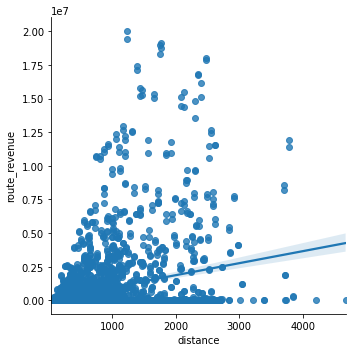

In [0]:
#distance scatter plot
sns.lmplot("distance","route_revenue",data = aa_overall_sorted_by_dist)
plt.xlabel("distance")
plt.ylabel("route_revenue")

In [0]:
aa_rev_total

3065368880.0

In [0]:
long_dist_low_rev = aa_overall_sorted_by_dist[(aa_overall_sorted_by_dist["distance"]>3000) & (aa_overall_sorted_by_dist["route_revenue"]<100000)]
long_dist_low_rev

,flight_route,distance,route_revenue,percent_total
575,CLT --> HNL,4678,46320.0,1.511074e-05
2229,ORD --> KOA,4213,11550.0,3.767899e-06
2129,OKC --> HNL,3743,460.0,1.500635e-07
3005,SEA --> SJU,3729,1030.0,3.360118e-07
1646,LAX --> SJU,3386,43450.0,1.417448e-05
283,BOS --> ANC,3383,9910.0,3.232890e-06
1584,LAS --> SJU,3220,4080.0,1.330998e-06
2555,PHX --> SJU,3016,2490.0,8.123003e-07


Island airpot/civil-military airport

In [0]:
aa_overall_routes

,airline_id,flight_route,flight_counts
0,AA,ABQ --> DFW,180
1,AA,ABQ --> ORD,9
2,AA,ALB --> CLT,90
3,AA,AMA --> DFW,24
4,AA,ANC --> DFW,6
...,...,...,...
751,AA,TUS --> DFW,248
752,AA,TUS --> JFK,12
753,AA,TUS --> ORD,74
754,AA,VPS --> DFW,31


In [0]:
long_d_low_rev_flights = aa_overall_routes[aa_overall_routes["flight_route"].isin(long_dist_low_rev["flight_route"])]
long_d_low_rev_flights #flight table not one-to-one??

,airline_id,flight_route,flight_counts


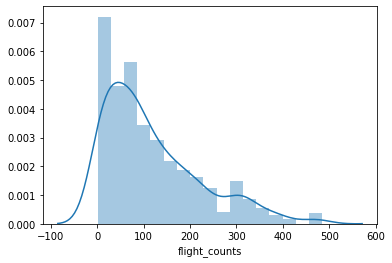

In [0]:
#plot a histogram to see the distribution 
sns.distplot(aa_overall_routes["flight_counts"])

In [0]:
aa_overall_routes_comb = aa_overall_routes[["flight_route","flight_counts"]].merge(aa_routes_fare_overall,on="flight_route")
aa_overall_routes_comb.head()

,flight_route,flight_counts,distance,route_revenue,percent_total
0,ABQ --> DFW,180,569,3361570.0,0.001097
1,ABQ --> ORD,9,1118,1054310.0,0.000344
2,ALB --> CLT,90,646,1547810.0,0.000505
3,AMA --> DFW,24,312,735600.0,0.000240
4,ANC --> DFW,6,3043,1178820.0,0.000385


In [0]:
aa_overall_routes_comb.sort_values("route_revenue",ascending=False)

,flight_route,flight_counts,distance,route_revenue,percent_total
351,LAX --> DFW,471,1235,20042280.0,0.006538
201,DFW --> LAX,466,1235,19461620.0,0.006349
101,CLT --> PHX,286,1773,19134720.0,0.006242
366,LAX --> ORD,306,1744,19024620.0,0.006206
591,PHX --> CLT,296,1773,18785280.0,0.006128
...,...,...,...,...,...
563,PHL --> LGA,36,96,78320.0,0.000026
386,LGA --> PHL,46,96,72810.0,0.000024
450,MIA --> TUL,8,1168,72790.0,0.000024
749,TUL --> MIA,6,1168,71650.0,0.000023


In [0]:
#can do 0-100 counts and 100-300 and >300 counts
#groupby take into account distance?
aa_low_routes = aa_overall_routes_comb[aa_overall_routes_comb["flight_counts"] <=100]
aa_mid_routes = aa_overall_routes_comb[(aa_overall_routes_comb["flight_counts"] >100) &(aa_overall_routes_comb["flight_counts"] <=300) ]
aa_high_routes=aa_overall_routes_comb[aa_overall_routes_comb["flight_counts"] >300]

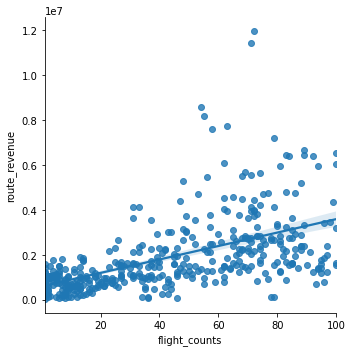

In [0]:
sum(aa_low_routes["percent_total"])
sns.lmplot("flight_counts","route_revenue",data =aa_low_routes )

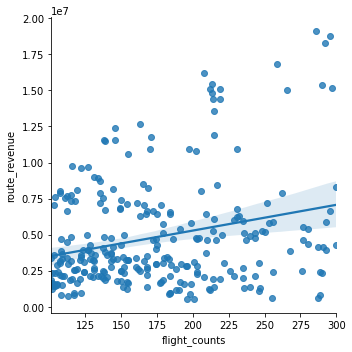

In [0]:
sum(aa_mid_routes["percent_total"])
sns.lmplot("flight_counts","route_revenue",data =aa_mid_routes )

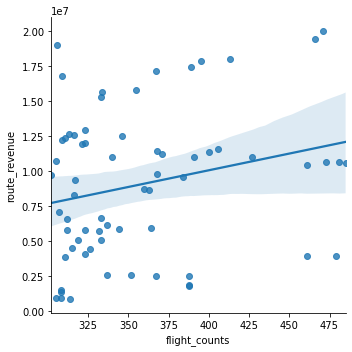

In [0]:
sum(aa_high_routes["percent_total"])
sns.lmplot("flight_counts","route_revenue",data =aa_high_routes )

In [0]:
#look at different quarters
aa_routes_fare

,quarter,airline_id,origin_airport,destination_airport,distance,route_revenue,passenger_counts,flight_route,trip
0,1,AA,CLT,SGF,708,98510.0,611.0,CLT --> SGF,CLT <-> SGF
3,1,AA,CLT,RDU,130,183630.0,6731.0,CLT --> RDU,CLT <-> RDU
5,1,AA,CLT,TPA,507,1110610.0,9732.0,CLT --> TPA,CLT <-> TPA
6,1,AA,DFW,IND,761,671640.0,3789.0,DFW --> IND,DFW <-> IND
8,1,AA,DFW,MHK,431,68750.0,744.0,DFW --> MHK,DFW <-> MHK
...,...,...,...,...,...,...,...,...,...
80811,4,AA,PIT,IAH,1117,290.0,1.0,PIT --> IAH,PIT <-> IAH
80812,4,AA,PHL,SAT,1496,300.0,1.0,PHL --> SAT,PHL <-> SAT
80813,4,AA,SLC,AUS,1086,340.0,1.0,SLC --> AUS,SLC <-> AUS
80815,4,AA,LGA,IAD,229,340.0,1.0,LGA --> IAD,LGA <-> IAD


In [0]:
aa_overall_routes

,airline_id,flight_route,flight_counts
0,AA,ABQ --> DFW,180
1,AA,ABQ --> ORD,9
2,AA,ALB --> CLT,90
3,AA,AMA --> DFW,24
4,AA,ANC --> DFW,6
...,...,...,...
751,AA,TUS --> DFW,248
752,AA,TUS --> JFK,12
753,AA,TUS --> ORD,74
754,AA,VPS --> DFW,31


In [0]:
aa_comb_by_quarter = aa_routes_fare.merge(aa_routes[["flight_route","flight_counts"]],on = "flight_route")

In [0]:
aa_overall_routes

,airline_id,flight_route,flight_counts
0,AA,ABQ --> DFW,180
1,AA,ABQ --> ORD,9
2,AA,ALB --> CLT,90
3,AA,AMA --> DFW,24
4,AA,ANC --> DFW,6
...,...,...,...
751,AA,TUS --> DFW,248
752,AA,TUS --> JFK,12
753,AA,TUS --> ORD,74
754,AA,VPS --> DFW,31


In [0]:
aa_routes

,airline_id,quarter,flight_route,flight_counts
0,AA,1,ABQ --> DFW,38
1,AA,1,ALB --> CLT,17
2,AA,1,AMA --> DFW,5
3,AA,1,ATL --> CLT,69
4,AA,1,ATL --> DFW,58
...,...,...,...,...
2699,AA,4,TUL --> MIA,3
2700,AA,4,TUL --> ORD,2
2701,AA,4,TUS --> DFW,55
2702,AA,4,TUS --> ORD,17


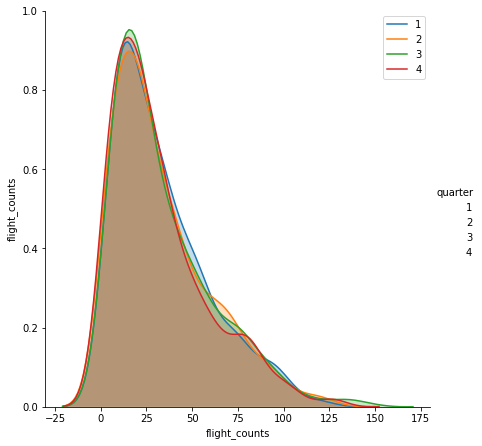

In [0]:
sns.pairplot(aa_routes[["flight_counts", "quarter"]], hue="quarter",height=6)
plt.legend()

In [0]:
aa_routes

,airline_id,quarter,flight_route,flight_counts
0,AA,1,ABQ --> DFW,38
1,AA,1,ALB --> CLT,17
2,AA,1,AMA --> DFW,5
3,AA,1,ATL --> CLT,69
4,AA,1,ATL --> DFW,58
...,...,...,...,...
2699,AA,4,TUL --> MIA,3
2700,AA,4,TUL --> ORD,2
2701,AA,4,TUS --> DFW,55
2702,AA,4,TUS --> ORD,17


In [0]:
routes_rev_count_quarter = aa_routes.merge(aa_routes_fare[["flight_route","quarter","distance","route_revenue"]],on = ["quarter","flight_route"],how="inner")
routes_rev_count_quarter

,airline_id,quarter,flight_route,flight_counts,distance,route_revenue
0,AA,1,ABQ --> DFW,38,569,720270.0
1,AA,1,ALB --> CLT,17,646,345310.0
2,AA,1,AMA --> DFW,5,312,166850.0
3,AA,1,ATL --> CLT,69,226,288110.0
4,AA,1,ATL --> DFW,58,731,1343630.0
...,...,...,...,...,...,...
2699,AA,4,TUL --> MIA,3,1168,22490.0
2700,AA,4,TUL --> ORD,2,585,190670.0
2701,AA,4,TUS --> DFW,55,813,1406390.0
2702,AA,4,TUS --> ORD,17,1437,779200.0


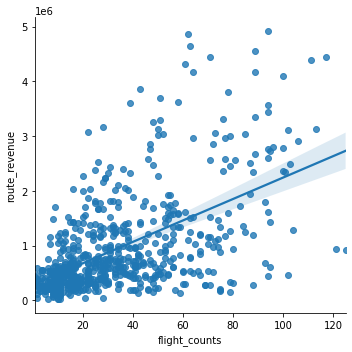

In [0]:
q1_comb = routes_rev_count_quarter[routes_rev_count_quarter["quarter"]==1].sort_values("route_revenue", ascending=False)
sns.lmplot("flight_counts","route_revenue",data=q1_comb)

In [0]:
q1_comb.head(10)

,airline_id,quarter,flight_route,flight_counts,distance,route_revenue
509,AA,1,PHX --> CLT,94,1773,4922020.0
86,AA,1,CLT --> PHX,62,1773,4857470.0
372,AA,1,MIA --> LAX,63,2342,4642210.0
305,AA,1,LAX --> JFK,89,2475,4548330.0
310,AA,1,LAX --> MIA,71,2342,4452780.0
300,AA,1,LAX --> DFW,117,1235,4439060.0
169,AA,1,DFW --> LAX,111,1235,4395560.0
432,AA,1,ORD --> LAX,61,1744,4322170.0
315,AA,1,LAX --> ORD,64,1744,4173270.0
269,AA,1,JFK --> LAX,89,2475,4169870.0


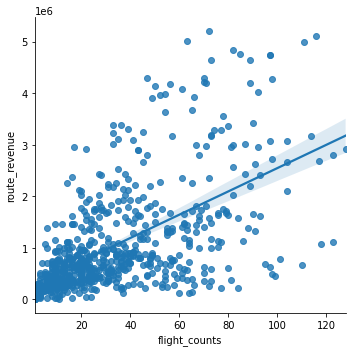

In [0]:
q2_comb = routes_rev_count_quarter[routes_rev_count_quarter["quarter"]==2].sort_values("route_revenue", ascending=False)
sns.lmplot("flight_counts","route_revenue",data=q2_comb)

In [0]:
q2_comb.head(10)

,airline_id,quarter,flight_route,flight_counts,distance,route_revenue
743,AA,2,CLT --> PHX,72,1773,5210090.0
973,AA,2,LAX --> DFW,116,1235,5104250.0
1185,AA,2,PHX --> CLT,63,1773,5016270.0
836,AA,2,DFW --> LAX,111,1235,4996960.0
987,AA,2,LAX --> ORD,82,1744,4832690.0
999,AA,2,LGA --> DFW,85,1389,4764680.0
838,AA,2,DFW --> LGA,97,1389,4749440.0
940,AA,2,JFK --> LAX,97,2475,4737620.0
977,AA,2,LAX --> JFK,89,2475,4646560.0
1100,AA,2,ORD --> LAX,73,1744,4643260.0


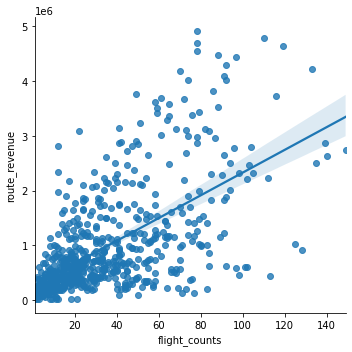

In [0]:
q3_comb = routes_rev_count_quarter[routes_rev_count_quarter["quarter"]==3].sort_values("route_revenue", ascending=False)
sns.lmplot("flight_counts","route_revenue",data=q3_comb)

In [0]:
q3_comb.head(10)

,airline_id,quarter,flight_route,flight_counts,distance,route_revenue
1954,AA,3,SEA --> DFW,78,1660,4918660.0
1654,AA,3,LAX --> DFW,110,1235,4796430.0
1667,AA,3,LAX --> ORD,78,1744,4690130.0
1526,AA,3,DFW --> LAX,119,1235,4640660.0
1781,AA,3,ORD --> LAX,78,1744,4546340.0
1557,AA,3,DFW --> SEA,88,1660,4477990.0
1678,AA,3,LGA --> DFW,97,1389,4438720.0
1432,AA,3,CLT --> PHX,92,1773,4301700.0
1622,AA,3,JFK --> LAX,133,2475,4222850.0
1558,AA,3,DFW --> SFO,70,1464,4191010.0


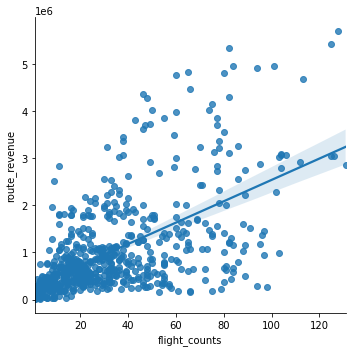

In [0]:
q4_comb = routes_rev_count_quarter[routes_rev_count_quarter["quarter"]==4].sort_values("route_revenue", ascending=False)
sns.lmplot("flight_counts","route_revenue",data=q4_comb)

In [0]:
q4_comb.head(10)

,airline_id,quarter,flight_route,flight_counts,distance,route_revenue
2337,AA,4,LAX --> DFW,128,1235,5702540.0
2200,AA,4,DFW --> LAX,125,1235,5428440.0
2350,AA,4,LAX --> ORD,82,1744,5328530.0
2202,AA,4,DFW --> LGA,84,1389,4959800.0
2341,AA,4,LAX --> JFK,101,2475,4955890.0
2308,AA,4,JFK --> LAX,94,2475,4906040.0
2553,AA,4,PHX --> CLT,65,1773,4834190.0
2472,AA,4,ORD --> LAX,80,1744,4811250.0
2111,AA,4,CLT --> PHX,60,1773,4765460.0
2361,AA,4,LGA --> DFW,113,1389,4680910.0


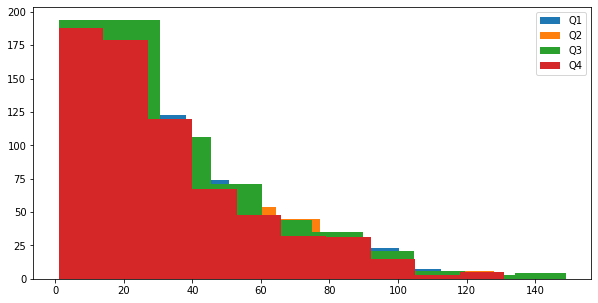

In [0]:
plt.figure(figsize=(10,5))
plt.hist(q1_comb["flight_counts"],label="Q1")
plt.hist(q2_comb["flight_counts"],label="Q2")
plt.hist(q3_comb["flight_counts"],label="Q3")
plt.hist(q4_comb["flight_counts"],label="Q4")
plt.legend()

In [0]:
aa_routes.groupby("flight_route").size()

flight_route
ABQ --> DFW    4
ABQ --> ORD    2
ALB --> CLT    4
AMA --> DFW    4
ANC --> DFW    1
              ..
TUS --> DFW    4
TUS --> JFK    2
TUS --> ORD    4
VPS --> DFW    2
XNA --> ORD    1
Length: 756, dtype: int64

In [0]:
aa_rev/sum(np.asarray(aa_rev))

array([0.2304759 , 0.26741367, 0.24547343, 0.25663701])

In [0]:
aa_pop_routes = routes_rev_count_quarter[(routes_rev_count_quarter["flight_counts"] > 70) &
                                         (routes_rev_count_quarter["route_revenue"] > 3000000.0)]

aa_all_year_routes = aa_pop_routes.groupby("flight_route").size()[aa_pop_routes.groupby("flight_route").size()==4]
aa_all_year_routes = aa_all_year_routes.to_frame().reset_index()
aa_all_year_routes

,flight_route,0
0,DFW --> LAX,4
1,DFW --> LGA,4
2,JFK --> LAX,4
3,LAX --> DFW,4
4,LAX --> JFK,4
5,LGA --> DFW,4
6,ORD --> PHX,4
7,SAN --> DFW,4
8,SFO --> DFW,4


In [0]:
aa_pop_routes_all_quarters = routes_rev_count_quarter[routes_rev_count_quarter["flight_route"].isin(aa_all_year_routes["flight_route"])]

In [0]:
aa_pop_routes_all_quarters.shape

(36, 6)

In [0]:
aa_routes.shape

(2704, 4)

In [0]:
np.repeat(aa_rev, len(aa_all_year_routes["flight_route"]))

array([7.0649364e+08, 7.0649364e+08, 7.0649364e+08, 7.0649364e+08,
       7.0649364e+08, 7.0649364e+08, 7.0649364e+08, 7.0649364e+08,
       7.0649364e+08, 8.1972154e+08, 8.1972154e+08, 8.1972154e+08,
       8.1972154e+08, 8.1972154e+08, 8.1972154e+08, 8.1972154e+08,
       8.1972154e+08, 8.1972154e+08, 7.5246661e+08, 7.5246661e+08,
       7.5246661e+08, 7.5246661e+08, 7.5246661e+08, 7.5246661e+08,
       7.5246661e+08, 7.5246661e+08, 7.5246661e+08, 7.8668709e+08,
       7.8668709e+08, 7.8668709e+08, 7.8668709e+08, 7.8668709e+08,
       7.8668709e+08, 7.8668709e+08, 7.8668709e+08, 7.8668709e+08])

In [0]:
aa_all_quarter_copy = np.copy(np.asarray(aa_pop_routes_all_quarters["route_revenue"]))
aa_rev_list_for_route = np.repeat(aa_rev, len(aa_all_year_routes["flight_route"]))
percent_pop_route = aa_all_quarter_copy /aa_rev_list_for_route
aa_pop_routes_all_quarters["% total"] = percent_pop_route
aa_pop_routes_all_quarters.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,airline_id,quarter,flight_route,flight_counts,distance,route_revenue,% total
169,AA,1,DFW --> LAX,111,1235,4395560.0,0.006222
171,AA,1,DFW --> LGA,94,1389,3441570.0,0.004871
269,AA,1,JFK --> LAX,89,2475,4169870.0,0.005902
300,AA,1,LAX --> DFW,117,1235,4439060.0,0.006283
305,AA,1,LAX --> JFK,89,2475,4548330.0,0.006438


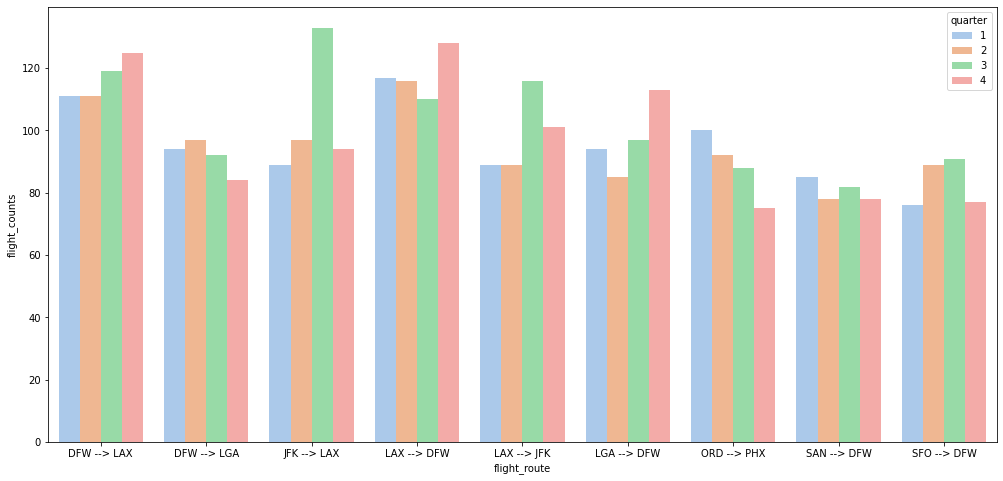

In [0]:
plt.figure(figsize=(17,8))
sns.barplot("flight_route","flight_counts",hue = "quarter",data=aa_pop_routes_all_quarters,palette = sns.color_palette("pastel"))

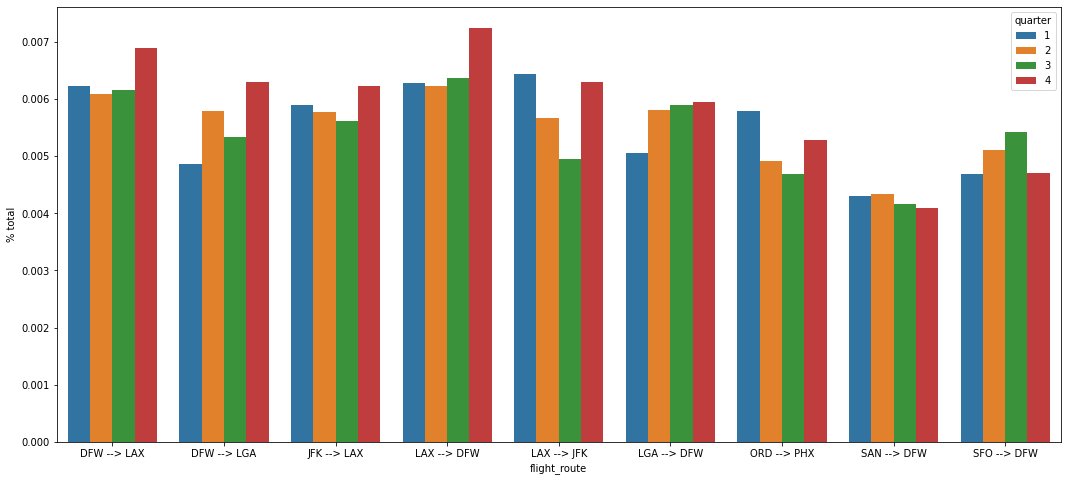

In [0]:
plt.figure(figsize=(18,8))
sns.barplot("flight_route","% total",hue = "quarter",data=aa_pop_routes_all_quarters)

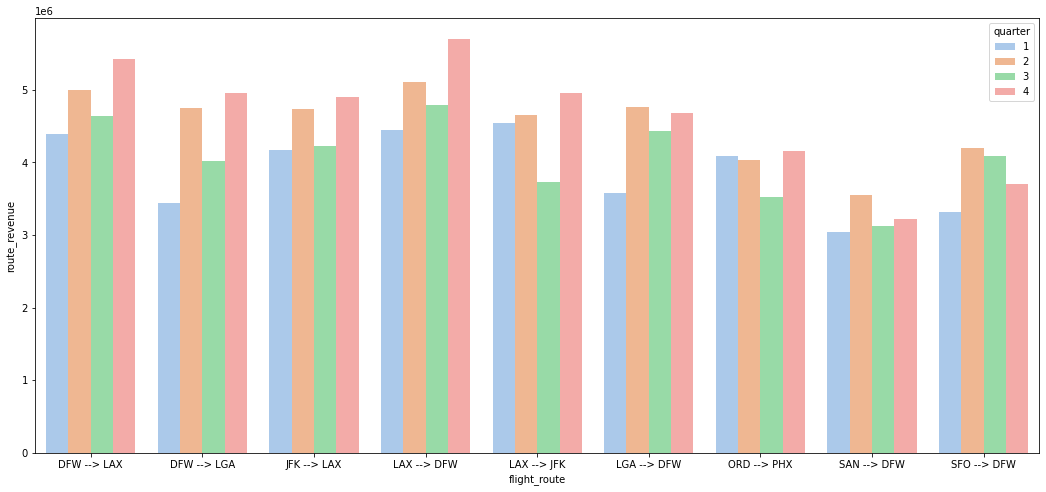

In [0]:
plt.figure(figsize=(18,8))
sns.barplot("flight_route","route_revenue",hue = "quarter",data=aa_pop_routes_all_quarters,palette = sns.color_palette("pastel"))

Percent revenue bar chart and revenue bar chart show different patterns, indicating that even though some of the popular routes have lower percentage of revenue in that quarter compared to other quarters, it can lead to higher revenue probably because more people are purchasing and the price is changing. The flight count chart disagrees with %revenue/route_revenue chart as well, even though another quarter assigns significant more flights in that route, the revenue can be smaller because of pricing and number of people purchasing.

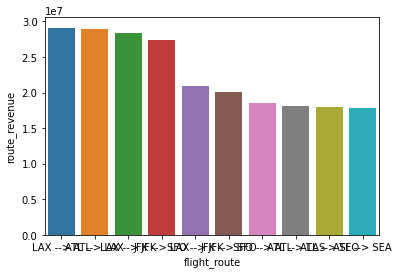

In [0]:
dl_routes_fare = routes_fare[routes_fare["airline_id"]=="DL"]
dl_routes_fare.sort_values("route_revenue",ascending=False).head(10)
dl_routes_fare_overall = dl_routes_fare[["flight_route","route_revenue"]].groupby("flight_route").sum().reset_index()
dl_routes_rev_sorted = dl_routes_fare_overall.sort_values("route_revenue",ascending=False).head(10)
sns.barplot(x = "flight_route" , y = "route_revenue", data = dl_routes_rev_sorted)

In [0]:
dl_routes_rev_sorted

,flight_route,route_revenue
807,LAX --> ATL,29095420.0
113,ATL --> LAX,28967000.0
824,LAX --> JFK,28392780.0
745,JFK --> LAX,27382760.0
1442,SFO --> JFK,20944540.0
767,JFK --> SFO,20083590.0
1437,SFO --> ATL,18507010.0
112,ATL --> LAS,18043450.0
169,ATL --> SFO,17925510.0
168,ATL --> SEA,17884700.0


In [0]:
dl_routes = grouped_route[grouped_route["airline_id"]=="DL"]
dl_routes.head()


,airline_id,quarter,flight_route,flight_counts
5116,DL,1,ABE --> ATL,8
5117,DL,1,ABQ --> ATL,14
5118,DL,1,ABQ --> SLC,13
5119,DL,1,AGS --> ATL,14
5120,DL,1,ALB --> ATL,27


In [0]:
#above is using a single fare table, below I join with flight table since fare and flight are not 1-1 corresponding
routes_rev_count_quarter_dl = dl_routes.merge(dl_routes_fare[["flight_route","quarter","distance","route_revenue"]],on = ["quarter","flight_route"],how="inner")
routes_rev_count_quarter_dl

,airline_id,quarter,flight_route,flight_counts,distance,route_revenue
0,DL,1,ABE --> ATL,8,692,209600.0
1,DL,1,ABQ --> ATL,14,1269,579080.0
2,DL,1,ABQ --> SLC,13,493,179170.0
3,DL,1,AGS --> ATL,14,143,110410.0
4,DL,1,ALB --> ATL,27,853,463580.0
...,...,...,...,...,...,...
3178,DL,4,TUS --> MSP,3,1298,133140.0
3179,DL,4,TVC --> DTW,13,207,88740.0
3180,DL,4,TYS --> ATL,32,152,176020.0
3181,DL,4,VPS --> ATL,44,250,293580.0


In [0]:
routes_rev_count_quarter_dl.groupby("flight_route").size()

flight_route
ABE --> ATL    4
ABQ --> ATL    4
ABQ --> MSP    3
ABQ --> SLC    4
AGS --> ATL    4
              ..
TVC --> DTW    3
TVC --> MSP    1
TYS --> ATL    4
VPS --> ATL    4
XNA --> ATL    4
Length: 917, dtype: int64